In [1]:
% matplotlib inline

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import bokeh.plotting as bplt
from IPython.display import display, HTML
from pprintpp import pprint as pp
import xgboost as xgb
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV

bplt.output_notebook()

Loading BokehJS ...

In [2]:
datanames  = ['product', 'sales', 'store', 'test', 'train']
sex = ['m', 'w']
age = ['00_19', '20_49', '50_']
segments = ['m00_19', 'm20_49', 'm50_', 'w00_19', 'w20_49', 'w50_']
pids = ['p000', 'p001', 'p002', 'p003', 'p004', 'p005', 'p006', 'p007',
       'p008', 'p009', 'p010', 'p011', 'p012', 'p013', 'p014', 'p015',
       'p016', 'p017', 'p018', 'p019', 'p020', 'p021', 'p022', 'p023',
       'p024', 'p025', 'p026', 'p027', 'p028', 'p029', 'p030', 'p031',
       'p032', 'p033', 'p034', 'p035', 'p036', 'p037', 'p038', 'p039',
       'p040', 'p041', 'p042', 'p043', 'p044', 'p045', 'p046', 'p047',
       'p048', 'p049', 'p050', 'p051', 'p052', 'p053', 'p054', 'p055',
       'p056', 'p057', 'p058', 'p059', 'p060', 'p061', 'p062', 'p063',
       'p064', 'p065', 'p066', 'p067', 'p068', 'p069', 'p070', 'p071',
       'p072']
train_dates = [201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604, 201605]
store_catecol = ['area', 'location']
size_dict = {'size_g': 'g', 'size_stick':'本', 'size_piece':'個', 'size_sheet':'枚'}
# 本 -> stick for index[50] , 個 -> stick for index[14, 15, 25, 37] , 枚 -> stick for index[27, 28] 
product_catecol = ['category', 'package_type', 'genre', 'manufacturer']
product_apeals = ['cal', '食物繊維', '乳酸菌', 'オリーブオイル', '砂糖', '糖類', '糖質', '食塩']
allergys= ['allergy_egg', 'allergy_wheat', 'allergy_milk', 'allergy_peanut', 'allergy_shrimp']

In [67]:
df_dict_origin = {datanames[n] : pd.read_csv('../data/{}.tsv'.format(name), delimiter='\t') for n, name in enumerate(datanames)}
df_dict = {name : df_dict_origin[name].copy() for name in df_dict_origin}

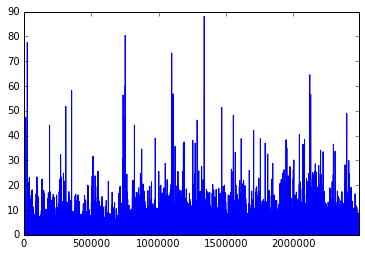

In [6]:
df_dict['sales'].quantity.plot()

In [14]:
sales_df = df_dict['sales'].merge(df_dict['product'][['pid', 'price']], on='pid')
sales_df['sale'] = sales_df.quantity * sales_df.price

In [87]:
colors = ['blue', 'green', 'red']
prices = df_dict['product'].price.value_counts().index.values

pricecolor = {p:c for p, c in zip(prices, colors)}
pricecolor_pid = {pid: pricecolor[price] for pid, price in df_dict['product'][['pid', 'price']].values}

## ToDo

* idをkeyにcolorlistを作る

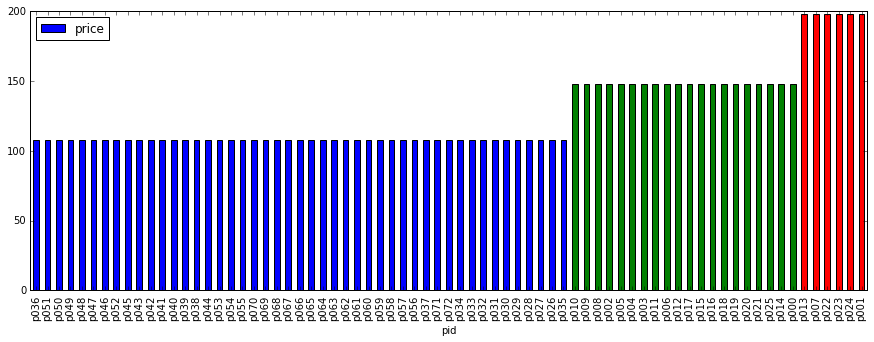

In [89]:
col = 'price'
color_list = [pricecolor_pid[p] for p in df_dict['product'].sort_values(col).pid]
df_dict['product'].sort_values(col).plot(x='pid', y=col, kind='bar', figsize=[15, 5], color=color_list)

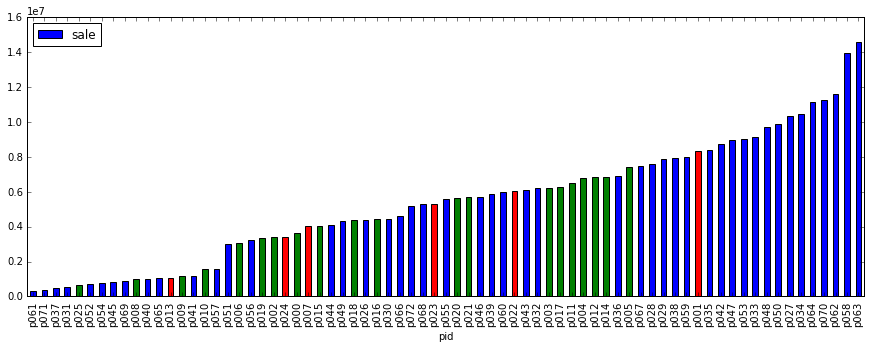

In [96]:
col = 'sale'
color_list = [pricecolor_pid[p] for p in sales_df.groupby('pid').sum().sort_values(col).index]
sales_df.groupby('pid').sum().sort_values(col).plot(y=col, kind='bar', figsize=[15, 5], color=color_list)

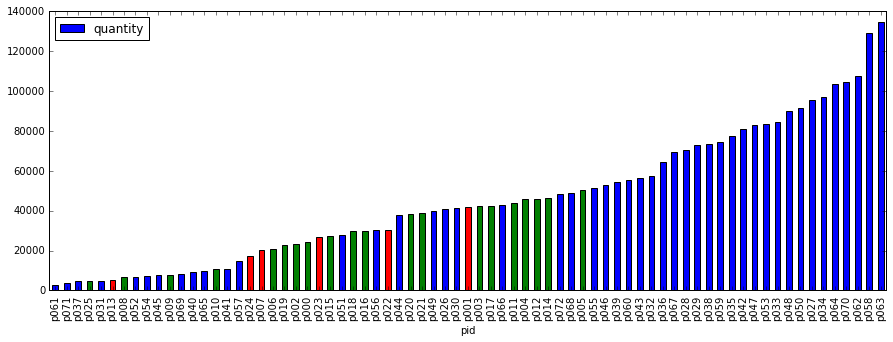

In [95]:
col = 'quantity'
color_list = [pricecolor_pid[p] for p in sales_df.groupby('pid').sum().sort_values(col).index]
sales_df.groupby('pid').sum().sort_values(col).plot(y=col, kind='bar', figsize=[15, 5], color=color_list)